In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
match= pd.read_csv('matches.csv')
delivery= pd.read_csv('deliveries.csv')

In [ ]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


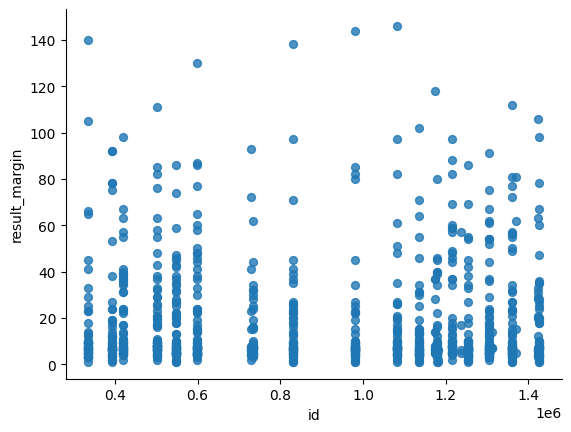

In [ ]:
# @title id vs result_margin

from matplotlib import pyplot as plt
match.plot(kind='scatter', x='id', y='result_margin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

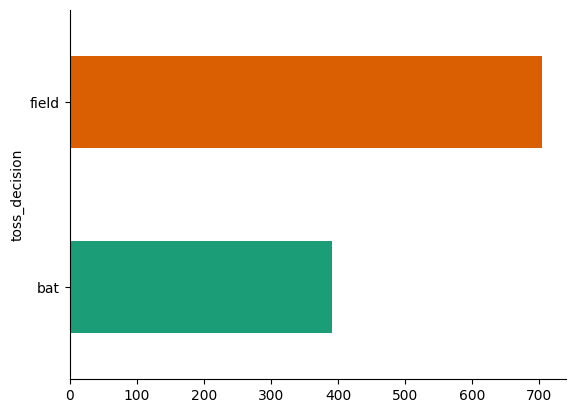

In [ ]:
# @title toss_decision

from matplotlib import pyplot as plt
import seaborn as sns
match.groupby('toss_decision').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
match.shape

(1095, 20)

In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,1.0,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,2.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,3.0,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,4.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0.0,5.0,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [ ]:
delivery.shape

(30525, 17)

In [ ]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
total_score_df=total_score_df[total_score_df['inning']==1]

In [ ]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222.0
2,335983,1,240.0
4,335984,1,129.0
6,335985,1,165.0
8,335986,1,110.0
...,...,...,...
252,419116,1,185.0
254,419117,1,170.0
256,419118,1,168.0
258,419119,1,151.0


In [ ]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222.0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240.0
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129.0
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165.0
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,419116,2009/10,Delhi,2010-03-19,League,ML Hayden,Feroz Shah Kotla,Delhi Daredevils,Chennai Super Kings,Delhi Daredevils,...,wickets,5.0,186.0,20.0,N,NaN,BR Doctrove,SK Tarapore,419116,185.0
126,419117,2009/10,Cuttack,2010-03-19,League,A Symonds,Barabati Stadium,Deccan Chargers,Kings XI Punjab,Kings XI Punjab,...,runs,6.0,171.0,20.0,N,NaN,BF Bowden,M Erasmus,419117,170.0
127,419118,2009/10,Ahmedabad,2010-03-20,League,AA Jhunjhunwala,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,...,runs,34.0,169.0,20.0,N,NaN,RE Koertzen,RB Tiffin,419118,168.0
128,419119,2009/10,Mumbai,2010-03-20,League,JH Kallis,Brabourne Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,7.0,152.0,20.0,N,NaN,HDPK Dharmasena,SS Hazare,419119,151.0


In [ ]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings'],
      dtype=object)

In [ ]:
teams=['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings']

In [ ]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(130, 22)

In [ ]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [ ]:
delivery_df=match_df.merge(delivery, on='match_id')

In [ ]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [ ]:
delivery_df.shape

(14614, 20)

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1.0,R Dravid,AB Dinda,W Jaffer,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
125,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2.0,W Jaffer,AB Dinda,R Dravid,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
126,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3.0,W Jaffer,AB Dinda,R Dravid,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
127,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4.0,W Jaffer,AB Dinda,R Dravid,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
128,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5.0,R Dravid,AB Dinda,W Jaffer,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30460,419119,Mumbai,Royal Challengers Bangalore,151.0,2,Royal Challengers Bangalore,Mumbai Indians,18.0,3.0,JH Kallis,KA Pollard,EJG Morgan,4.0,0.0,4.0,NaN,0.0,NaN,NaN,NaN
30461,419119,Mumbai,Royal Challengers Bangalore,151.0,2,Royal Challengers Bangalore,Mumbai Indians,18.0,4.0,JH Kallis,KA Pollard,EJG Morgan,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
30462,419119,Mumbai,Royal Challengers Bangalore,151.0,2,Royal Challengers Bangalore,Mumbai Indians,18.0,5.0,JH Kallis,KA Pollard,EJG Morgan,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
30463,419119,Mumbai,Royal Challengers Bangalore,151.0,2,Royal Challengers Bangalore,Mumbai Indians,18.0,6.0,EJG Morgan,KA Pollard,JH Kallis,2.0,0.0,2.0,NaN,0.0,NaN,NaN,NaN


In [ ]:


# Convert 'total_runs_y' to numeric, handling errors by setting non-numeric values to 0
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce').fillna(0).astype(int)

# Now apply the cumsum function
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [ ]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [ ]:
delivery_df['balls_left']=120 - (delivery_df['over']*6 + delivery_df['ball'])

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1.0,R Dravid,...,0.0,1,NaN,0.0,NaN,NaN,NaN,1,221.0,119.0
125,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2.0,W Jaffer,...,1.0,1,wides,0.0,NaN,NaN,NaN,2,220.0,118.0
126,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3.0,W Jaffer,...,0.0,0,NaN,0.0,NaN,NaN,NaN,2,220.0,117.0
127,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4.0,W Jaffer,...,0.0,1,NaN,0.0,NaN,NaN,NaN,3,219.0,116.0
128,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5.0,R Dravid,...,0.0,1,NaN,0.0,NaN,NaN,NaN,4,218.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30460,419119,Mumbai,Royal Challengers Bangalore,151.0,2,Royal Challengers Bangalore,Mumbai Indians,18.0,3.0,JH Kallis,...,0.0,4,NaN,0.0,NaN,NaN,NaN,148,3.0,9.0
30461,419119,Mumbai,Royal Challengers Bangalore,151.0,2,Royal Challengers Bangalore,Mumbai Indians,18.0,4.0,JH Kallis,...,0.0,0,NaN,0.0,NaN,NaN,NaN,148,3.0,8.0
30462,419119,Mumbai,Royal Challengers Bangalore,151.0,2,Royal Challengers Bangalore,Mumbai Indians,18.0,5.0,JH Kallis,...,0.0,1,NaN,0.0,NaN,NaN,NaN,149,2.0,7.0
30463,419119,Mumbai,Royal Challengers Bangalore,151.0,2,Royal Challengers Bangalore,Mumbai Indians,18.0,6.0,EJG Morgan,...,0.0,2,NaN,0.0,NaN,NaN,NaN,151,0.0,6.0


In [ ]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna('0')
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=='0' else '1')
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype(int) # Ensure 'player_dismissed' is of numeric type
wickets=delivery_df.groupby('match_id')['player_dismissed'].cumsum().values # Apply cumsum on numeric column
delivery_df['wickets']=10-wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1.0,R Dravid,...,1,NaN,0.0,0,NaN,NaN,1,221.0,119.0,10
125,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2.0,W Jaffer,...,1,wides,0.0,0,NaN,NaN,2,220.0,118.0,10
126,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3.0,W Jaffer,...,0,NaN,0.0,0,NaN,NaN,2,220.0,117.0,10
127,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4.0,W Jaffer,...,1,NaN,0.0,0,NaN,NaN,3,219.0,116.0,10
128,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5.0,R Dravid,...,1,NaN,0.0,0,NaN,NaN,4,218.0,115.0,10


#current runs/overs

In [ ]:
delivery_df['curr']=(delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

required run rate

In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,curr,rrr
124,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1.0,R Dravid,...,0.0,0,NaN,NaN,1,221.0,119.0,10,6.000000,11.142857
125,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2.0,W Jaffer,...,0.0,0,NaN,NaN,2,220.0,118.0,10,6.000000,11.186441
126,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3.0,W Jaffer,...,0.0,0,NaN,NaN,2,220.0,117.0,10,4.000000,11.282051
127,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4.0,W Jaffer,...,0.0,0,NaN,NaN,3,219.0,116.0,10,4.500000,11.327586
128,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5.0,R Dravid,...,0.0,0,NaN,NaN,4,218.0,115.0,10,4.800000,11.373913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30460,419119,Mumbai,Royal Challengers Bangalore,151.0,2,Royal Challengers Bangalore,Mumbai Indians,18.0,3.0,JH Kallis,...,0.0,0,NaN,NaN,148,3.0,9.0,7,8.000000,2.000000
30461,419119,Mumbai,Royal Challengers Bangalore,151.0,2,Royal Challengers Bangalore,Mumbai Indians,18.0,4.0,JH Kallis,...,0.0,0,NaN,NaN,148,3.0,8.0,7,7.928571,2.250000
30462,419119,Mumbai,Royal Challengers Bangalore,151.0,2,Royal Challengers Bangalore,Mumbai Indians,18.0,5.0,JH Kallis,...,0.0,0,NaN,NaN,149,2.0,7.0,7,7.911504,1.714286
30463,419119,Mumbai,Royal Challengers Bangalore,151.0,2,Royal Challengers Bangalore,Mumbai Indians,18.0,6.0,EJG Morgan,...,0.0,0,NaN,NaN,151,0.0,6.0,7,7.947368,0.000000


In [ ]:
def result(row):
  return 1 if row['batting_team']== row['winner'] else 0

In [ ]:
# Use apply to evaluate the function row by row
delivery_df['result'] = delivery_df.apply(lambda row: result(row), axis=1)



In [ ]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,curr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,1.0,R Dravid,...,0,NaN,NaN,1,221.0,119.0,10,6.0,11.142857,0
125,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,2.0,W Jaffer,...,0,NaN,NaN,2,220.0,118.0,10,6.0,11.186441,0
126,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,3.0,W Jaffer,...,0,NaN,NaN,2,220.0,117.0,10,4.0,11.282051,0
127,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,4.0,W Jaffer,...,0,NaN,NaN,3,219.0,116.0,10,4.5,11.327586,0
128,335982,Bangalore,Kolkata Knight Riders,222.0,2,Royal Challengers Bangalore,Kolkata Knight Riders,0.0,5.0,R Dravid,...,0,NaN,NaN,4,218.0,115.0,10,4.8,11.373913,0


In [ ]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','curr','rrr','result']]

In [ ]:
final_df=final_df.sample(final_df.shape[0])

In [ ]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,curr,rrr,result
28715,Royal Challengers Bangalore,Kings XI Punjab,Bangalore,197.0,112.0,10,203.0,4.5,10.553571,1


In [ ]:
final_df.isnull().sum()

,0
batting_team,0
bowling_team,0
city,0
runs_left,0
balls_left,0
wickets,0
total_runs_x,0
curr,0
rrr,2
result,0


In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df = final_df[final_df['balls_left']!=0]

In [ ]:
X= final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,curr,rrr
25825,Kings XI Punjab,Chennai Super Kings,Durban,73.0,58.0,8,116.0,4.161290,7.551724
9609,Chennai Super Kings,Kolkata Knight Riders,Kolkata,146.0,113.0,10,149.0,2.571429,7.752212
3276,Kings XI Punjab,Delhi Daredevils,Chandigarh,8.0,14.0,5,158.0,8.490566,3.428571
20497,Mumbai Indians,Deccan Chargers,Centurion,62.0,49.0,7,145.0,7.014085,7.591837
17319,Royal Challengers Bangalore,Kolkata Knight Riders,Durban,72.0,56.0,10,139.0,6.281250,7.714286
...,...,...,...,...,...,...,...,...,...
24040,Chennai Super Kings,Mumbai Indians,Port Elizabeth,147.0,119.0,9,147.0,0.000000,7.411765
17784,Delhi Daredevils,Deccan Chargers,Centurion,112.0,88.0,8,148.0,6.750000,7.636364
4976,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,65.0,24.0,5,178.0,7.062500,16.250000
27796,Delhi Daredevils,Kings XI Punjab,Chandigarh,73.0,53.0,7,142.0,6.179104,8.264151


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8778311599176389

In [ ]:
pipe.predict_proba(X_test)[2]

array([0.23301355, 0.76698645])

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [ ]:
pipe.predict_proba(X_test)[4]

array([1., 0.])

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [ ]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','curr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target



In [ ]:
print(delivery_df['match_id'].unique())


[335982 335983 335984 335985 335986 335987 335988 335989 335990 335991
 335992 335993 335994 335995 335996 335997 335998 335999 336000 336001
 336003 336034 336004 336005 336006 336007 336008 336009 336010 336011
 336013 336014 336015 336016 336017 336018 336020 336021 336022 336023
 336024 336025 336026 336027 336028 336029 336031 336032 336033 336002
 336035 336036 336037 336012 336019 336038 336039 336040 392181 392182
 392183 392184 392185 392186 392188 392189 392190 392191 392192 392194
 392195 392196 392197 392198 392199 392200 392201 392202 392203 392204
 392205 392206 392207 392208 392209 392210 392211 392212 392213 392214
 392215 392216 392217 392218 392219 392220 392221 392222 392223 392224
 392225 392226 392227 392228 392229 392230 392231 392232 392233 392234
 392235 392236 392237 392238 392239 419106 419107 419108 419109 419110
 419111 419112 419113 419114 419115 419116 419117 419118 419119]


In [ ]:
temp_df, target = match_progression(delivery_df, 335986, pipe)
print(temp_df)
print(target)

Target- 110.0
      end_of_over  runs_after_over  wickets_in_over  lose    win
1061            1              6.0                0   0.0  100.0
1067            2             10.0                1   3.0   97.0
1073            3              2.0                1   0.0  100.0
1079            4              3.0                0   1.0   99.0
1085            5              2.0                1   0.0  100.0
1091            6              3.0                0   0.0  100.0
1097            7              6.0                0   0.0  100.0
1104            8              2.0                0   0.0  100.0
1110            9              1.0                0   0.0  100.0
1117           10              3.0                0   0.0  100.0
1124           11             11.0                0   0.0  100.0
1130           12             12.0                0   0.0  100.0
1139           13              6.0                0   0.0  100.0
1147           14             10.0                1   1.0   99.0
1153       

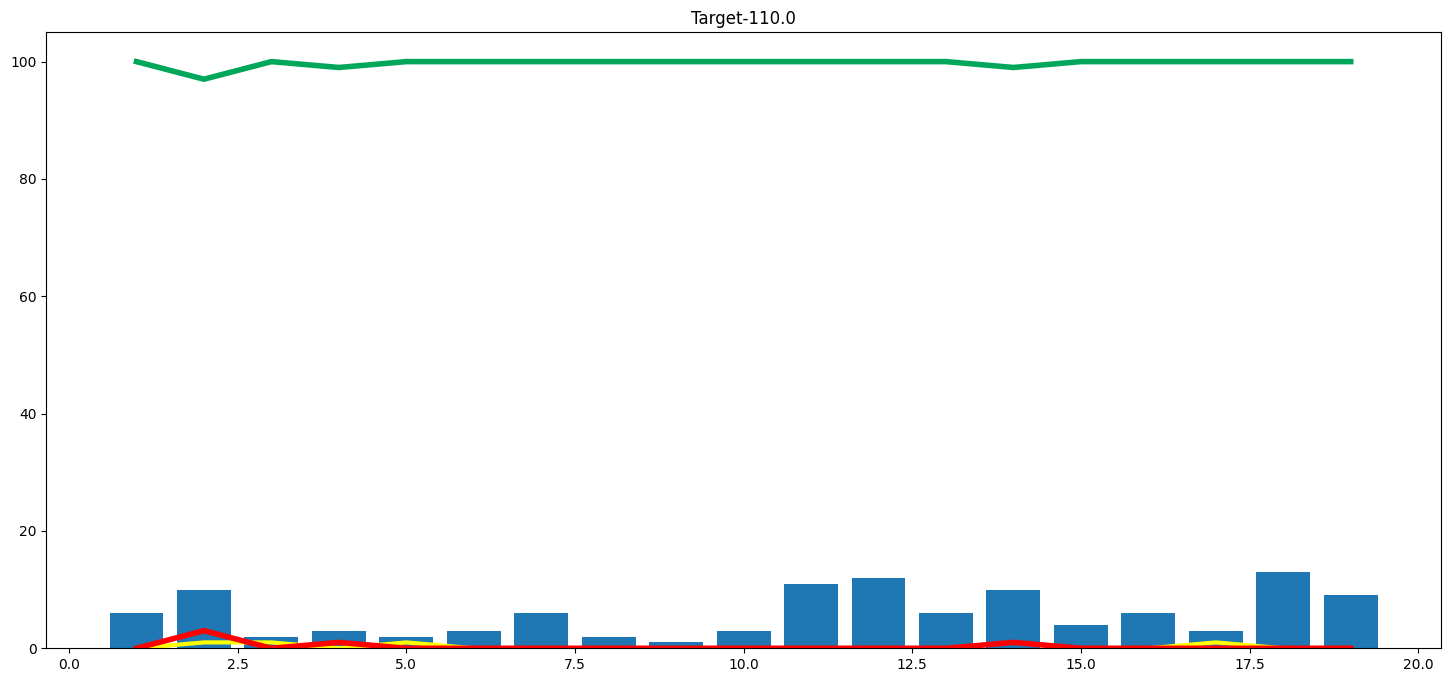

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'], temp_df['wickets_in_over'], color='yellow', linewidth=3)
plt.plot(temp_df['end_of_over'], temp_df['win'], color='#00a65a', linewidth=4)
plt.plot(temp_df['end_of_over'], temp_df['lose'], color='red', linewidth=4)
plt.bar(temp_df['end_of_over'], temp_df['runs_after_over'])
plt.title('Target-' + str(target))  # Add the closing parenthesis here
plt.show()